integral:  6.6853091668390805
integral uncertainty:  0.07863342801169997


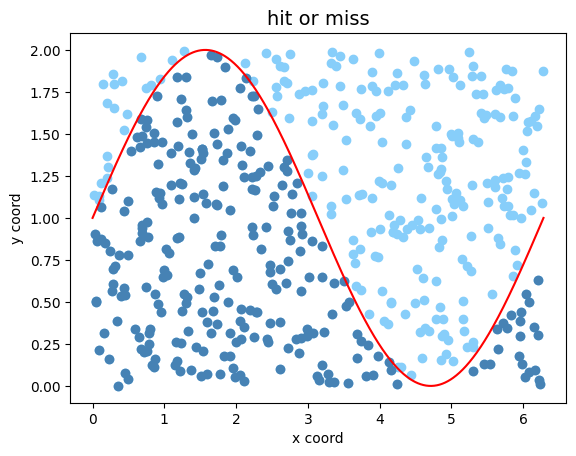

In [1]:
import sys
import numpy as np
from math import floor
import math as mt
import matplotlib.pyplot as plt

from random import random
from random import uniform
import scipy.stats as stats


def func (x) : 
    return 1. + np.sin (x) ; 


# ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- 

xMin = 0
xMax = 2*mt.pi
yMax = 2
N_evt = 500

x_coord = [uniform(xMin, xMax) for _ in range( N_evt)]
y_coord = [uniform(0, yMax) for _ in range( N_evt)]

x_under = []
y_under = []
for x, y in zip (x_coord, y_coord):
    if (func (x) > y) : 
        x_under.append (x)
        y_under.append (y)

points_under = len (x_under)
A_rett = (xMax - xMin) * yMax
frac = float (points_under) / float (len (x_coord))
integral = A_rett * frac
integral_unc = A_rett**2 * frac * (1 - frac) / len (x_coord)

print ('integral: ', integral)
print ('integral uncertainty: ', integral_unc)

fig, ax = plt.subplots ()
ax.set_title ('hit or miss', size=14)
ax.set_xlabel ('x coord')
ax.set_ylabel ('y coord')
ax.scatter (x_coord, y_coord, color='lightskyblue')
ax.scatter (x_under, y_under, color='steelblue')

x = np.linspace(xMin, xMax, 1000)
y = func (x)
ax.plot (x, y, color = 'red')

plt.show ()

In [2]:
def integral_HOM (func, xMin, xMax, yMax, N_evt, return_points=False) :

    x_coord = [uniform(xMin, xMax) for _ in range( N_evt)]
    y_coord = [uniform(0, yMax) for _ in range( N_evt)]

    points_under = 0
    for x, y in zip (x_coord, y_coord):
        if (func (x) > y) : points_under = points_under + 1 

    x_under = []
    y_under = []
    for x, y in zip (x_coord, y_coord):
        if (func (x) > y) : 
            x_under.append (x)
            y_under.append (y)

    A_rett = (xMax - xMin) * yMax
    frac = float (points_under) / float (N_evt)
    integral = A_rett * frac
    integral_unc = A_rett**2 * frac * (1 - frac) / N_evt

    if not return_points:
        return integral, integral_unc
    else: 
        return integral, integral_unc, x_coord, y_coord, x_under, y_under

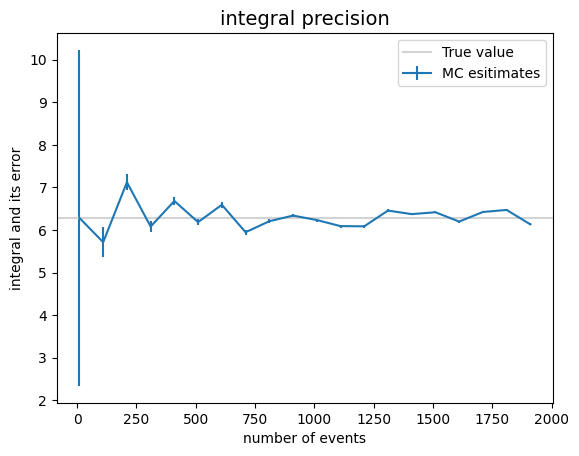

In [3]:
def func (x) : 
    return 1. + np.sin (x) ; 


xMin = 0
xMax = 2*mt.pi
yMax = 2
N_evt = 500
N_evt_min = 10
N_evt_max = 2000

N_events = []
integrals = []
integral_errors = []
while (N_evt_min < N_evt_max) :
    integral, integral_unc = integral_HOM (func, xMin, xMax, yMax, N_evt_min)
    integrals.append (integral)
    integral_errors.append (integral_unc)
    N_events.append (N_evt_min)
    N_evt_min = N_evt_min + 100

fig, ax = plt.subplots ()
ax.set_title ('integral precision', size=14)
ax.set_xlabel ('number of events')
ax.set_ylabel ('integral and its error')
ax.errorbar (N_events, integrals, xerr = 0.0, yerr = integral_errors, label="MC esitimates")
ax.axhline(2*mt.pi, color='lightgrey', label="True value")
ax.legend()


plt.show()

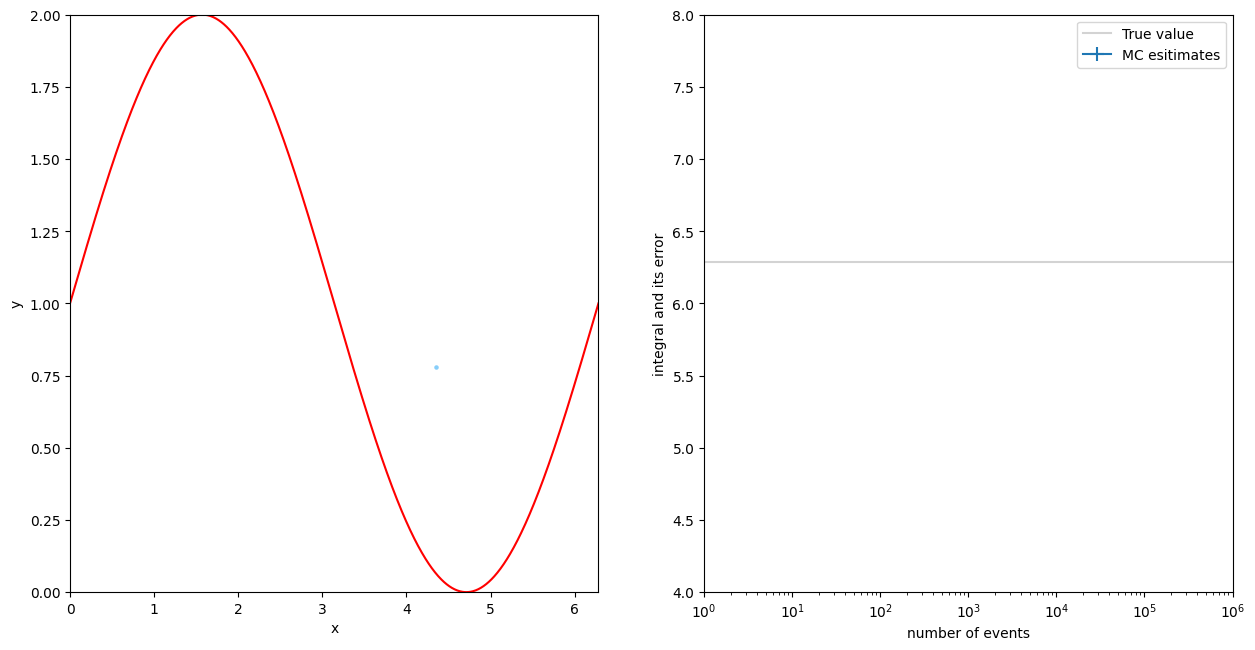

In [4]:
import matplotlib.patches as patches
import matplotlib.animation as animation

xMin = 0
xMax = 2*mt.pi
yMax = 2
N_evt = 500
N_evt_min = 1
N_evt_max = 1000000

fig, ax = plt.subplots(1,2, figsize=(15,7.5))

scat = ax[0].scatter(-100, 100, s=5, color='lightskyblue')
scat2 = ax[0].scatter(-100, 100, s=5, color='steelblue')

ax[0].set(xlim=[0, 2*mt.pi], ylim=[0, 2], xlabel='x', ylabel='y')
ax[1].set(xlim=[1, N_evt_max],  ylim=[4, 8], xlabel='number of events', ylabel="integral and its error")

x = np.linspace(0, 2*mt.pi, 1000)
y = func (x)
ax[0].plot (x, y, color = 'red')
lines,_ , (bottoms, tops) = ax[1].errorbar(0.0001, 100000000, xerr = 0.0, yerr = 1.0, label="MC esitimates")
ax[1].axhline(2*mt.pi, color='lightgrey', label="True value")
ax[1].legend()
ax[1].set_xscale("log")

def func (x) : 
    return 1. + np.sin (x) ; 

N_events = []
integrals = []
integral_errors = []
x__ = []
y__ = []
x__unders = []
y__unders = []
while (N_evt_min < N_evt_max) :
    integral, integral_unc, x_coord, y_coord, x_under, y_under = integral_HOM (func, xMin, xMax, yMax, N_evt_min, return_points=True)
    integrals.append (integral)
    integral_errors.append (integral_unc)
    N_events.append (N_evt_min)
    x__.append(np.array(x_coord))
    y__.append(np.array(y_coord))
    x__unders.append(np.array(x_under))
    y__unders.append(np.array(y_under))
    N_evt_min = int(N_evt_min * 2.0)
    
def update(frame):
    # for each frame, update the data stored on each artist.

    # first axis
    x = x__[frame]
    y = y__[frame]
    x_u = x__unders[frame]
    y_u = y__unders[frame]

    data = np.stack([x, y]).T
    data_u = np.stack([x_u, y_u]).T
  

    
    # update the scatter plot:
    scat.set_offsets(data)
    scat2.set_offsets(data_u)

    data_line = np.stack([N_events[:frame], integrals[:frame]]).T
    data_bottom = np.array([integrals[i] - integral_errors[i] for i in range(frame)])
    data_up = np.array([integrals[i] + integral_errors[i] for i in range(frame)])
    lines.set_data((N_events[:frame], integrals[:frame]))
    bottoms.set_offsets(np.stack([N_events[:frame], data_bottom]).T)
    tops.set_offsets(np.stack([N_events[:frame], data_up]).T)
    
    return (scat, scat2, lines, (bottoms, tops))


ani = animation.FuncAnimation(fig=fig, func=update, frames=len(N_events), interval=1)
ani.save(filename="GIFs/mc_integral.gif", writer="pillow", fps=500)